In [1]:
import numpy as np
%matplotlib notebook
import pylab as plt
import pickle as pickle

import networkx as nx

from NAQ_graphs import NAQ

#for automatic graph generation
import yaml as yaml
from graph_generator import generate_graph
import os as os

<IPython.core.display.Javascript object>


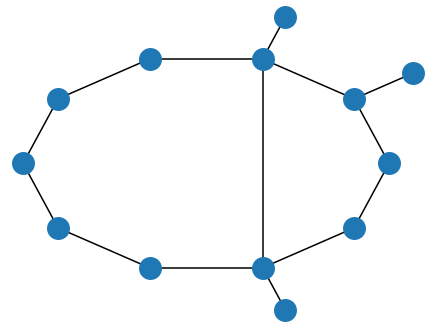

In [2]:
#create a small world network, using automatic generation, see generate_graph and graph_params for more

graph_tpe = 'SM'
params = yaml.load(open('graph_params.yaml','rb'))[graph_tpe]

G, pos  = generate_graph(tpe=graph_tpe, params = params)

if not os.path.isdir(graph_tpe):
    os.mkdir(graph_tpe)
os.chdir(graph_tpe)

#plot the graph
plt.figure(figsize=(4,3))
nx.draw(G, pos=pos, node_size=200)

In [3]:
#setup the main object
chi = np.array([ 1.j for i in range(len(G.edges))])

naq_u1 = NAQ(G, positions = pos, chi = chi, group = 'U1', open_graph = True)

naq_u1.n_processes_scan = 4 #number of CPU to use

#random update
naq_u1.update_chi([1.,1.])

#construct the graph laplacian
naq_u1.update_laplacian()

In [4]:
#find modes in some range of k and alpha=Im(k)
Ks = np.linspace(7, 14, 20)
Alphas = np.linspace(0, .6, 20)

modes = naq_u1.find_modes(Ks, Alphas, params, th = 1e-3) #find many modes (start many searches in a grid)
pickle.dump(modes, open('modes.pkl', 'wb')) #save them for later

18 modes out of 386 attempts


In [5]:
#do a complete fine scan for ploting
Ks = np.linspace(7,14, 100)
Alphas = np.linspace(0,.6, 50)

s = naq_u1.scan_k(Ks,Alphas) #compute a fine scan of the parameter space
pickle.dump([Ks, Alphas, s], open('scan.pkl', 'wb')) #save it for later

<IPython.core.display.Javascript object>


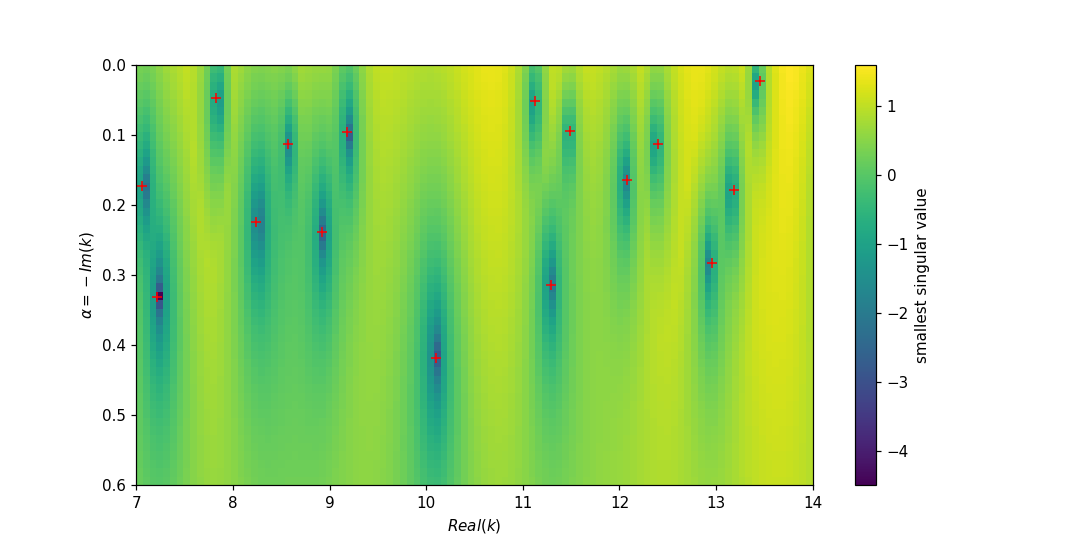

In [6]:
#plot the fine scan and the mode found
naq_u1.plot_scan(Ks,Alphas,s,modes)
plt.savefig('scan_modes.svg')

k= (13.451925924163598-0.022395540007166714j)


<IPython.core.display.Javascript object>


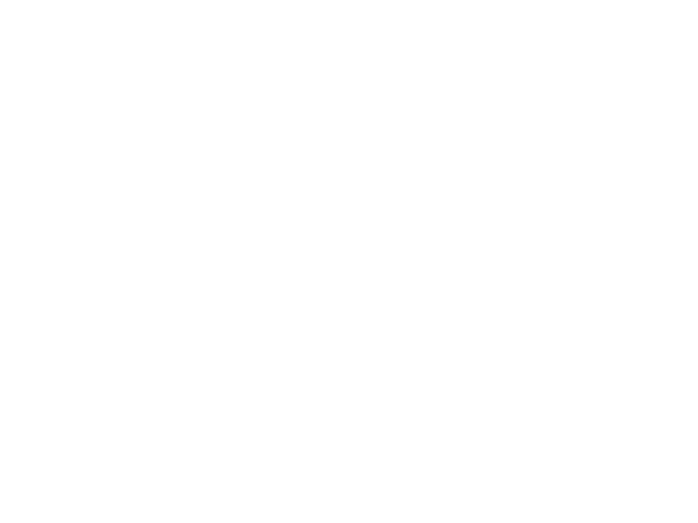

k= (7.820312899312084-0.04785076396747939j)


<IPython.core.display.Javascript object>


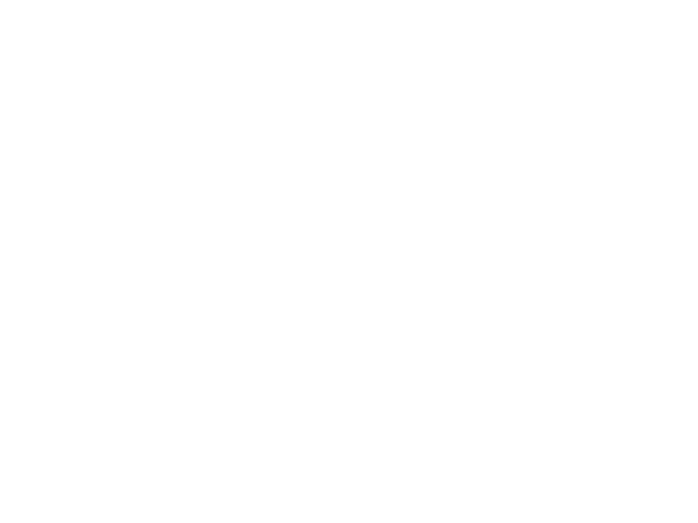

k= (11.126447397278884-0.05175590777493154j)


<IPython.core.display.Javascript object>


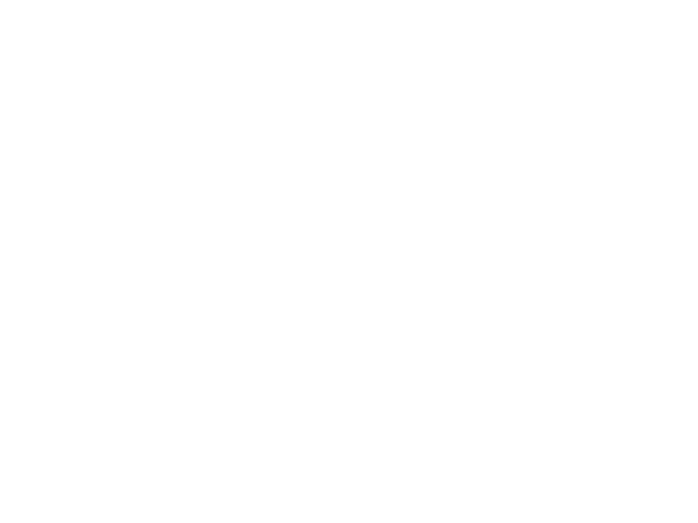

k= (11.489081672870038-0.09479138625983913j)


<IPython.core.display.Javascript object>


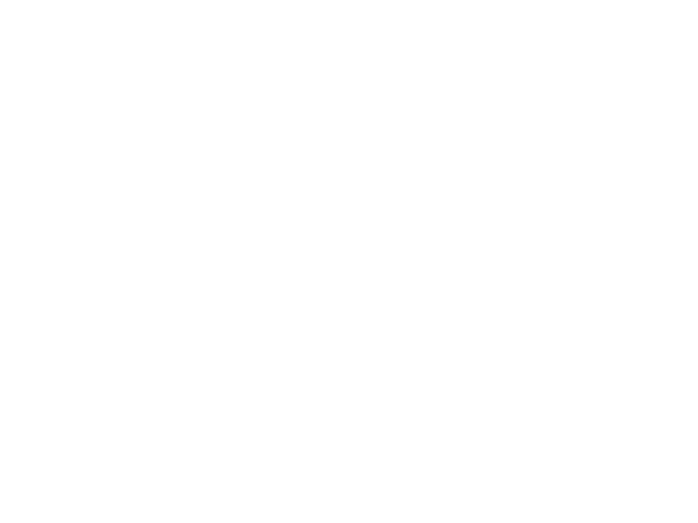

k= (9.183830963870953-0.09591601396720728j)


<IPython.core.display.Javascript object>


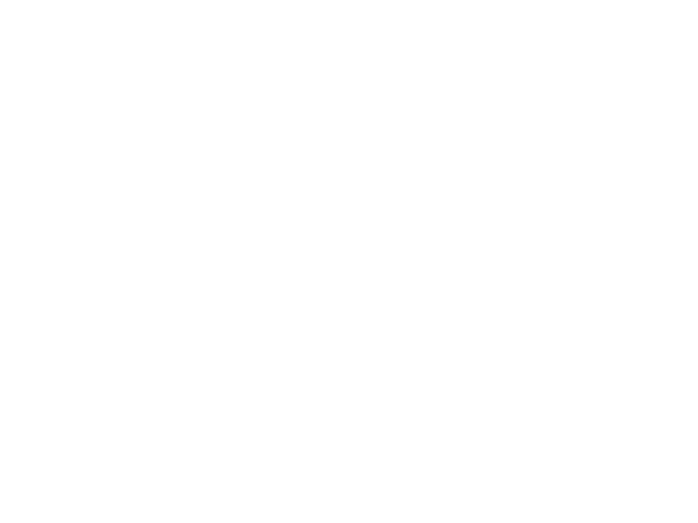

k= (8.574125291189482-0.1122043261944116j)


<IPython.core.display.Javascript object>


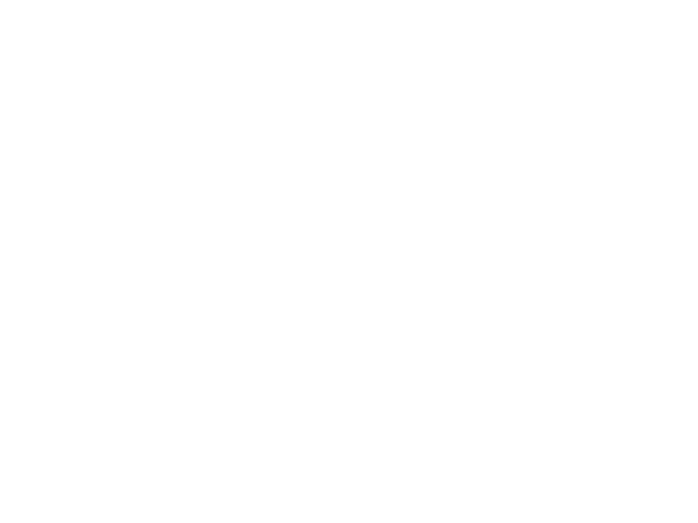

k= (12.401423450800527-0.11322128750539517j)


<IPython.core.display.Javascript object>


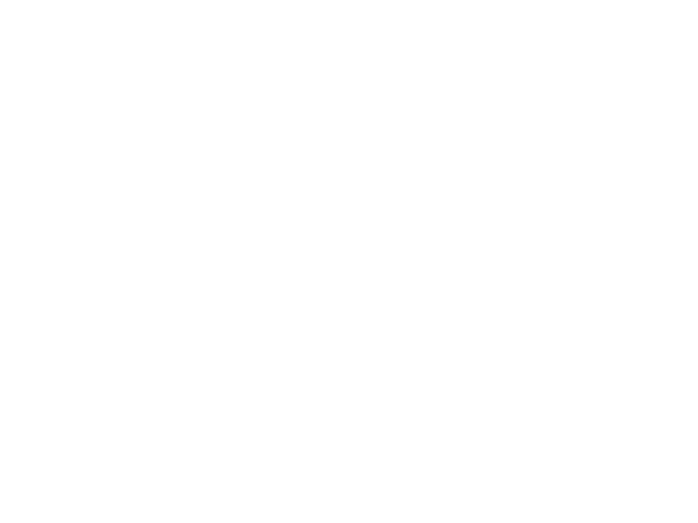

k= (14.23781882097967-0.15355184147690343j)


<IPython.core.display.Javascript object>


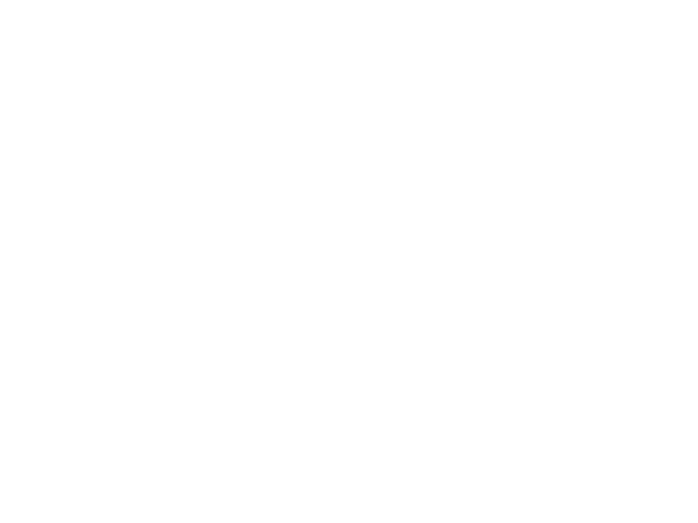

k= (12.072965557140035-0.16425143673305853j)


<IPython.core.display.Javascript object>


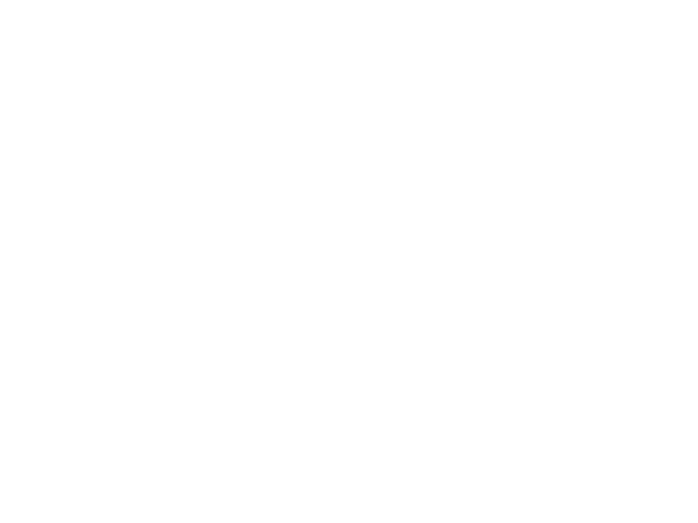

k= (7.053609950749203-0.1730765839250224j)


<IPython.core.display.Javascript object>


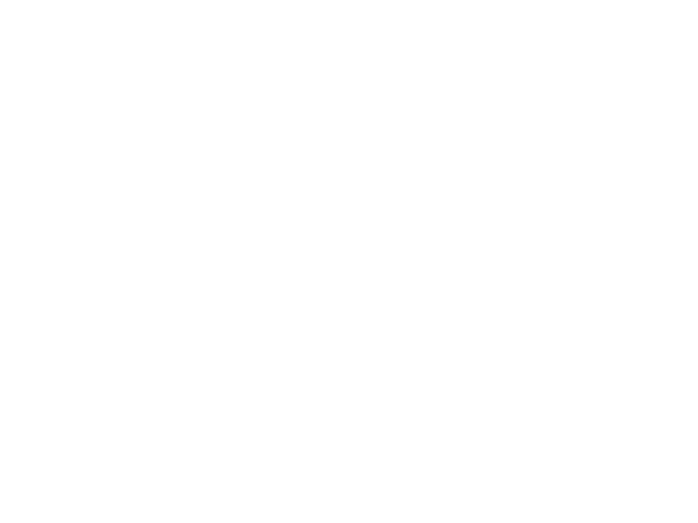

k= (13.182957169742627-0.17924695764255338j)


<IPython.core.display.Javascript object>


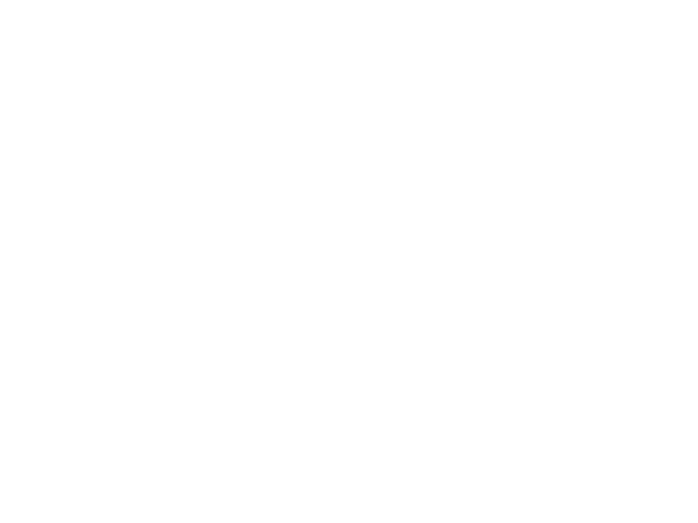

k= (8.24251678690242-0.22358407636075447j)


<IPython.core.display.Javascript object>


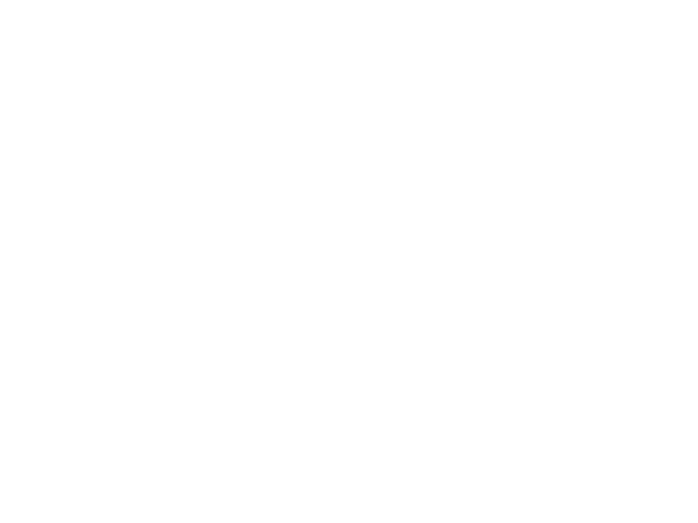

k= (8.921272977258447-0.23864331997915766j)


<IPython.core.display.Javascript object>


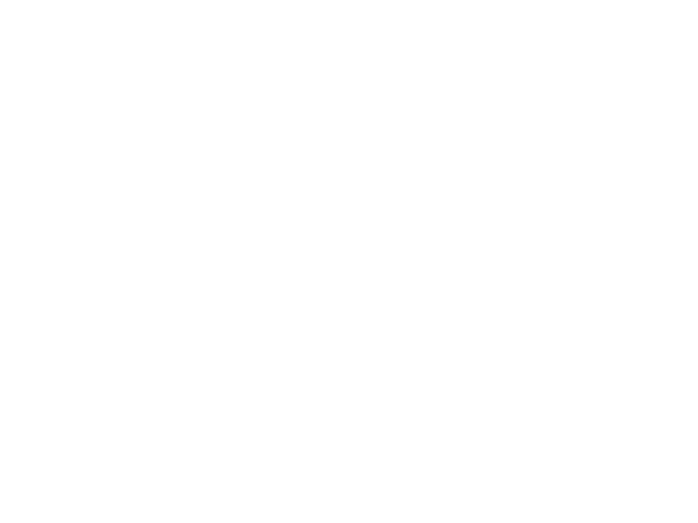

k= (12.956863283752126-0.2829727966942684j)


<IPython.core.display.Javascript object>


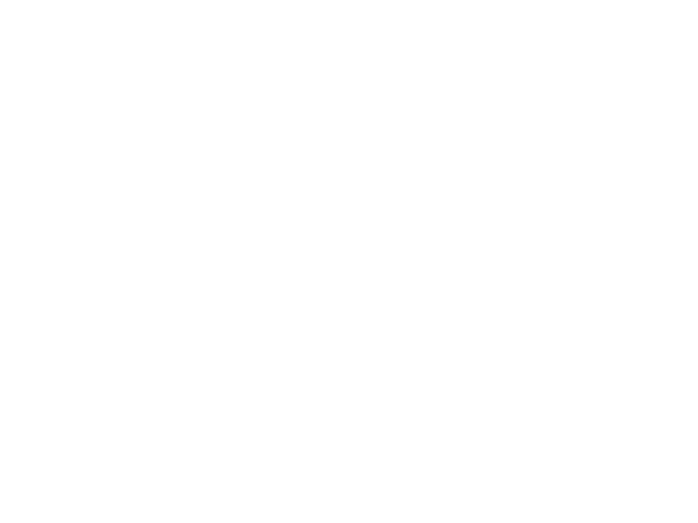

k= (11.293443774660858-0.3142457762510777j)


<IPython.core.display.Javascript object>


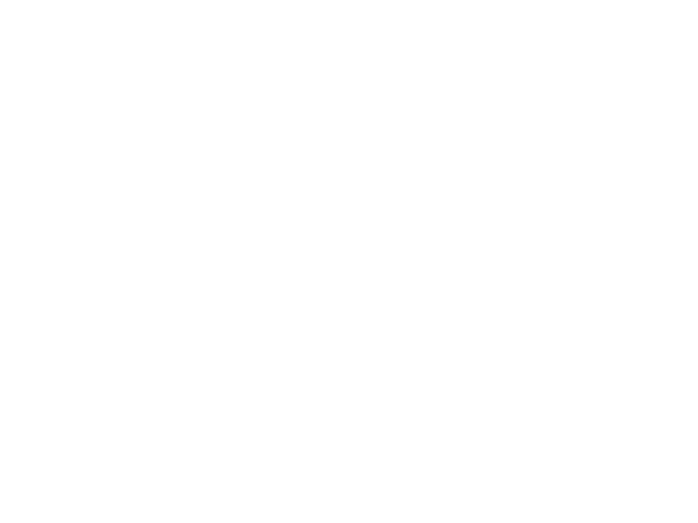

k= (14.374188934492842-0.31459754025870856j)


<IPython.core.display.Javascript object>


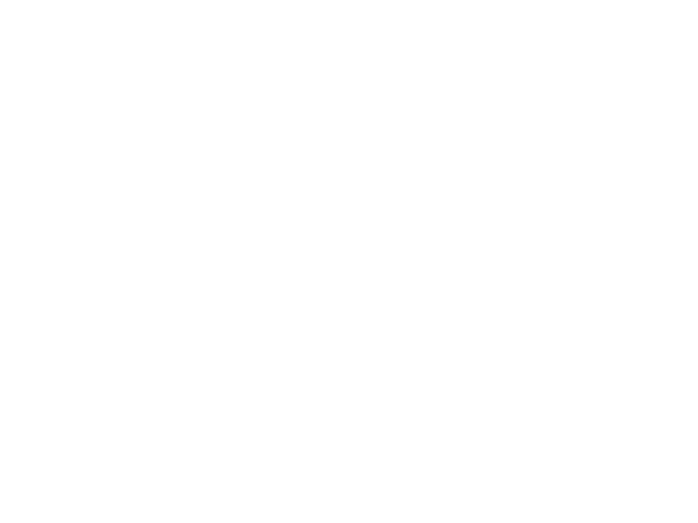

k= (7.210124568341525-0.3316016550281086j)


<IPython.core.display.Javascript object>


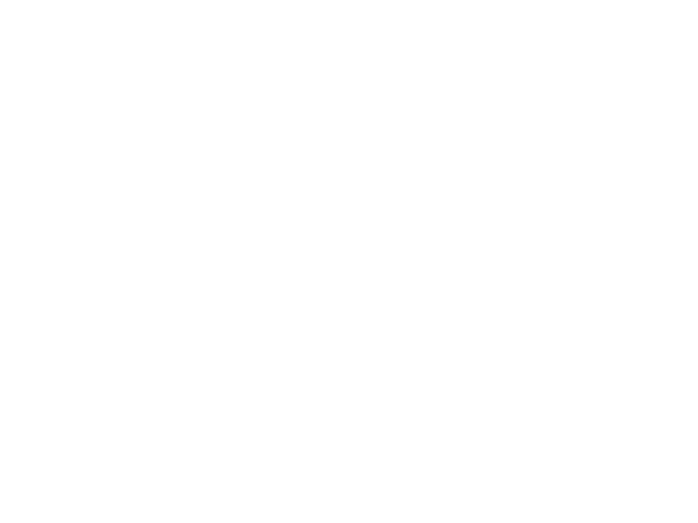

k= (10.097892904153683-0.41832082069865545j)


<IPython.core.display.Javascript object>


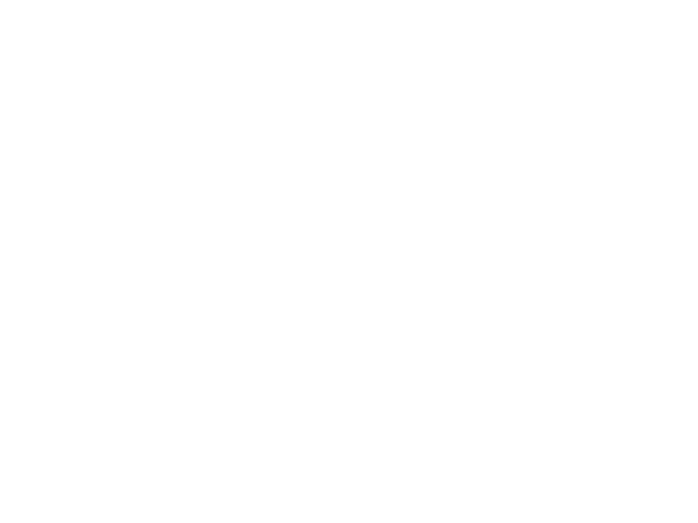

In [7]:
#for each mode, save a figure for it
if not os.path.isdir('modes'):
    os.mkdir('modes')

for m in range(len(modes)):
    print("k=", modes[m,0]-1j*modes[m,1])

    naq_u1.set_chi((modes[m,0]-1j*modes[m,1])*naq_u1.chi0)
    naq_u1.update_laplacian()
    phi = naq_u1.compute_solution()
    
    plt.figure()
    nx.draw_networkx_nodes(G,pos=pos, node_color = np.real(phi), cmap='bwr')#, vmin=-np.max(abs(np.real(phi))),vmax=np.max(abs(np.real(phi))))
    nx.draw_networkx_edges(G,pos=pos) #, vmin=-np.max(abs(np.real(phi))),vmax=np.max(abs(np.real(phi))))

    plt.title("k="+str(np.around(modes[m,0],2)-1j*np.around(modes[m,1],3)))

    plt.savefig('modes/mode_'+str(m)+'.svg')
    plt.close()